## TPE, Algorithmiques et structures de données II
# La Simplification des Polylignes

In [1]:
import numpy as np
import matplotlib.pyplot as plt # pour la visualisation

### La structure élémentaire qui représente un segment

In [2]:
class Segment:
    def __init__(self, i_deb, i_fin, i_max, d_max):
        self.i_deb = i_deb
        self.i_fin = i_fin
        self.i_max = i_max
        self.d_max = d_max
    
    # l'opérateur '>' pour pour comparer deux segments
    def __gt__(self, autre):
        return self.d_max > autre.d_max

### Cette fonction retourne le sommet le plus distant d'un segment

In [3]:
def plus_loin(X, Y, i_deb, i_fin):
    
    """y = ax + b: l'équation de la ligne"""
    a = (Y[i_fin] - Y[i_deb]) / (X[i_fin] - X[i_deb])
    b = Y[i_deb] - a * X[i_deb] 

    d_max = 0
    j = i_deb
    
    for i in range(i_deb + 1, i_fin):
        """la distance max parallèle à l'axe des données"""
        d = np.abs(Y[i] - a * X[i] - b)
        if d > d_max:
            d_max = d
            j = i
            
    return j, d_max

### Pour la visualisation

In [4]:
def _plot(X, Y, W, titre=None):
    W.sort()
    plt.plot(X, Y, color='blue')
    plt.plot(X[W], Y[W], color='green')
    if titre: plt.title(titre)
    plt.show()

### La structure TasMax et ses méthodes pour la recherche et l'insertion

In [5]:
CAPACITE_MAX = 1000

class TasMax:
    
    def __init__(self, segment=None):
        self.taille = 0
        self.T = [None] * CAPACITE_MAX
        if segment:
            self.T[0] = segment
            self.taille += 1
    
    def est_vide(self):
        return (self.taille == 0)
    
    def racine(self):
        return self.T[0]
    
    # Cette méthode insère deux segments à la fois
    def inserer(self, segment1, segment2=None):
        # insérer le premier segment
        self.T[0] = segment1
        # placer le premier segment dans le bon endroit
        i = 0
        i_max = i
        f_g = 2 * i + 1 # l'indice du fils gauche
        f_d = 2 * i + 2 # l'indice du fils droit
        while True:
            if f_g < self.taille and self.T[i] < self.T[f_g]: i_max = f_g
            if f_d < self.taille and self.T[i_max] < self.T[f_d]: i_max = f_d
            
            if i != i_max:
                self.T[i], self.T[i_max] = self.T[i_max], self.T[i]
                i = i_max
                f_g = 2 * i + 1
                f_d = 2 * i + 2
            else: break
        
        # insérer le deuxième segment
        self.T[self.taille] = segment2
        self.taille += 1
        # placer le deuxième segment dans le bon endroit
        i = self.taille - 1
        i_parent = (i - 1) // 2 # l'indice du parent
        while i != 0 and self.T[i] > self.T[i_parent]:
            self.T[i_parent], self.T[i] = self.T[i], self.T[i_parent]
            i = i_parent
            i_parent = (i - 1) // 2

###  L'algorithme principale

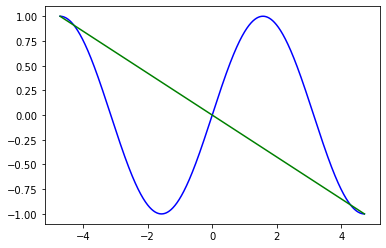

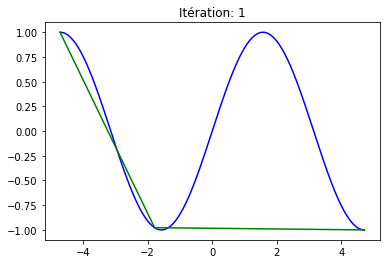

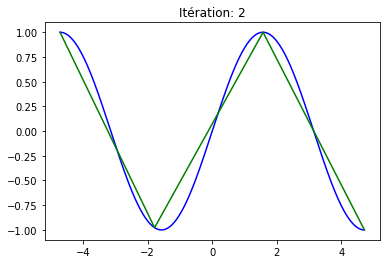

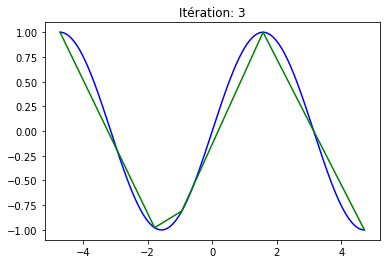

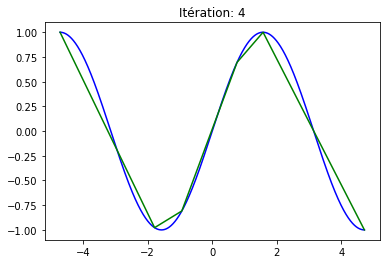

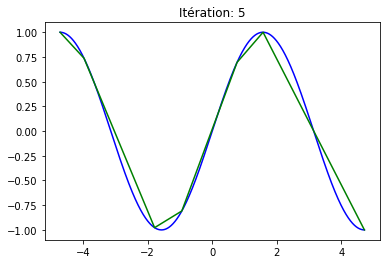

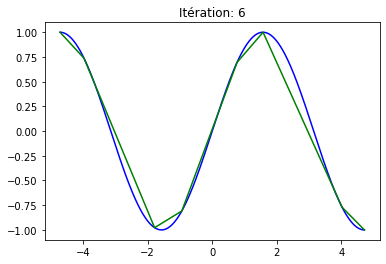

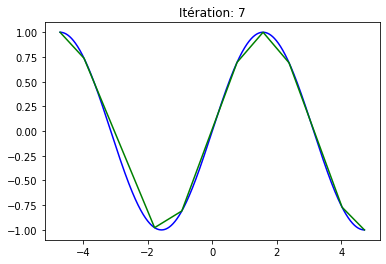

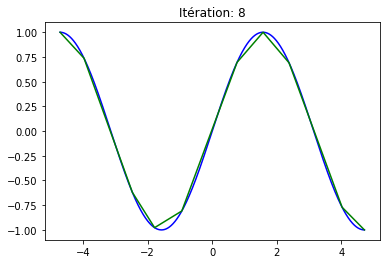

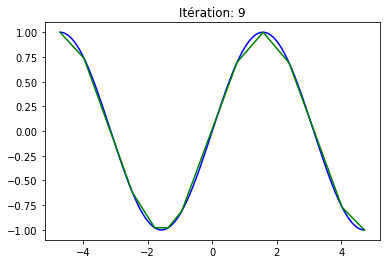

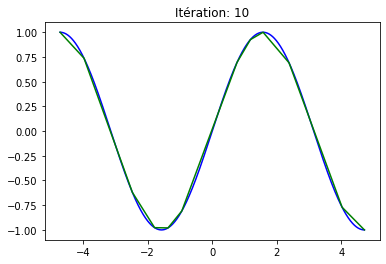

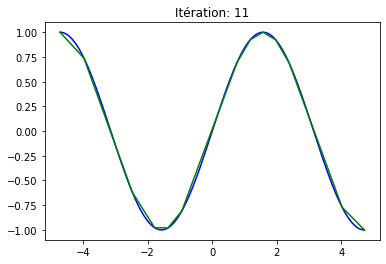

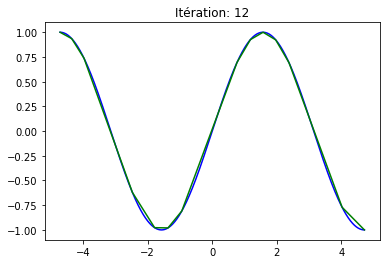

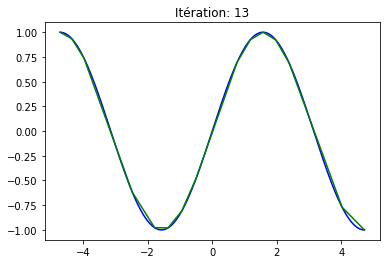

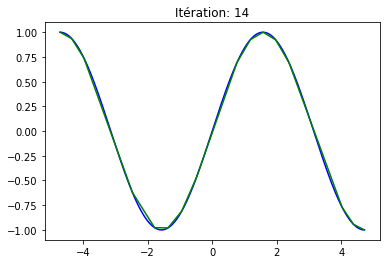

In [6]:
# Entrées
N = 10000
X = np.linspace(-3*np.pi/2, 3*np.pi/2, N)
Y = np.sin(X)
M = 50
epsilon = 0.05

# sorties
W = [0, N-1] # la simplification
K = 2 # la taille de W
e = -1 # l'erreur final défini après la première itération


# visualisation initiale
_plot(X, Y, W)


# initialiser le tas
i_max, d_max = plus_loin(X, Y, 0, N-1)
segment = Segment(0, N-1, i_max, d_max)
tas = TasMax(segment)


# itérations
while (not tas.est_vide()) and (K < M):
    
    # rechercher le segment le plus distant
    segment = tas.racine()
    e = segment.d_max
    if e <= epsilon: break # car la distance maximale est déja < epsilon (TasMax)
    
    # insérer le sommet associé
    W.append(segment.i_max)
    K += 1
    
    # diviser en deux nouveaux segments
    i_max1, d_max1 = plus_loin(X, Y, segment.i_deb, segment.i_max)
    i_max2, d_max2 = plus_loin(X, Y, segment.i_max, segment.i_fin)
    
    segment1 = Segment(segment.i_deb, segment.i_max, i_max1, d_max1)
    segment2 = Segment(segment.i_max, segment.i_fin, i_max2, d_max2)
    
    # insérer les nouveaux segments
    tas.inserer(segment1, segment2)
    
    # visualisation
    _plot(X, Y, W, 'Itération: '+ str(K-2))